In [33]:
import folium
import json
import webbrowser
import requests
import json
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import os
import webbrowser
import folium
from folium import plugins
from bokeh.models import *
from bokeh.plotting import *
from bokeh.io import *
from bokeh.tile_providers import *
from bokeh.palettes import *
from bokeh.transform import *
from bokeh.layouts import *
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [2]:
data = pd.read_csv("C:/Users/user/samsung_dataset.csv", low_memory=False, encoding='CP949')

In [173]:
grouped = data.groupby([data['ENGINE'], data['DETAIL']])

In [174]:
grouped.count()

ID  CAR_YEAR  GENDER     AGE    SIDO   GUNGU  \
ENGINE  DETAIL                                                            
1.6 GTe LE              73524     73524   73524   73524   72663   72663   
        LE Plus        210274    210274  210274  210274  209042  209042   
        RE              44649     44649   44649   44649   44238   44238   
        SE              11410     11410   11410   11410   11402   11402   
TCe 260 LE              13999     13999   13999   13999   13999   13999   
        RE             135274    135274  135274  135274  135272  135272   
        RE Signature   501440    501440  501440  501440  500810  500810   
        RE Signature+      86        86      86      86      86      86   

                       Unnamed: 8   CH_NM   CH_NF  STORE_NM  STORE_SIDO  \
ENGINE  DETAIL                                                            
1.6 GTe LE                      0   73524   73524     73524       41056   
        LE Plus                 0  210274  210274    210274      113112   
        RE                      0   44649   44649     44649       23462   
        SE                      0   11410   11410     11410        5898   
TCe 260 LE                      0   13999   13999     13999        7086   
        RE                      0  135274  135274    135274       73770   
        RE Signature            0  501440  501440    501440      263041   
        RE Signature+           0      86      86        86          25   

                       STORE_GUNGU    DATE   CTGR1   CTGR2   CTGR3   BRAND  \
ENGINE  DETAIL                                                               
1.6 GTe LE                   41056   73524   73524   73524   73524   68729   
        LE Plus             113112  210274  210274  210274  210274  197016   
        RE                   23462   44649   44649   44649   44649   41459   
        SE                    5898   11410   11410   11410   11410   10777   
TCe 260 LE                    7086   13999   13999   13999   13999   13003   
        RE                   73770  135274  135274  135274  135274  126758   
        RE Signature        263041  501440  501440  501440  501440  470724   
        RE Signature+           25      86      86      86      86      78   

                       PRD_NM      CT      AM  
ENGINE  DETAIL                                 
1.6 GTe LE              73524   73524   73524  
        LE Plus        210274  210274  210274  
        RE              44649   44649   44649  
        SE              11410   11410   11410  
TCe 260 LE              13999   13999   13999  
        RE             135274  135274  135274  
        RE Signature   501440  501440  501440  
        RE Signature+      86      86      86

In [5]:
col = data.groupby([data['ENGINE'], data['DETAIL']])['GENDER'].value_counts().unstack(level=2).T
col= data.groupby([data['ENGINE'], data['DETAIL']])['AGE'].value_counts().unstack(level=2).T
col= data.groupby([data['ENGINE'], data['DETAIL']])['SIDO'].value_counts().unstack(level=2).T
col= data.groupby([data['ENGINE'], data['DETAIL']])['GUNGU'].value_counts().unstack(level=2).T
col= data.groupby([data['ENGINE'], data['DETAIL']])['CH_NM'].value_counts().unstack(level=2).T
col= data.groupby([data['ENGINE'], data['DETAIL']])['CTGR1'].value_counts().unstack(level=2).T
col= data.groupby([data['ENGINE'], data['DETAIL']])['CTGR2'].value_counts().unstack(level=2).T
col= data.groupby([data['ENGINE'], data['DETAIL']])['CTGR3'].value_counts().unstack(level=2).T

In [6]:
k = data.groupby([data['ENGINE'], data['DETAIL']])['CTGR3'].value_counts().unstack(level=2).T
k.append(data.groupby([data['ENGINE'], data['DETAIL']])['CTGR2'].value_counts().unstack(level=2).T)
k.append(data.groupby([data['ENGINE'], data['DETAIL']])['CTGR1'].value_counts().unstack(level=2).T)
k.append(data.groupby([data['ENGINE'], data['DETAIL']])['CH_NM'].value_counts().unstack(level=2).T)
k.append(data.groupby([data['ENGINE'], data['DETAIL']])['GUNGU'].value_counts().unstack(level=2).T)
k.append(data.groupby([data['ENGINE'], data['DETAIL']])['SIDO'].value_counts().unstack(level=2).T)
k.append(data.groupby([data['ENGINE'], data['DETAIL']])['AGE'].value_counts().unstack(level=2).T)
k.append(data.groupby([data['ENGINE'], data['DETAIL']])['GENDER'].value_counts().unstack(level=2).T)

ENGINE         1.6 GTe                            TCe 260           \
DETAIL              LE   LE Plus       RE      SE      LE       RE   
2단우산               1.0       5.0      1.0     NaN     NaN      4.0   
3단우산               2.0       6.0      NaN     1.0     NaN     12.0   
BB/파운데이션/컴팩트류     27.0      58.0     21.0     NaN     4.0     46.0   
CA/TV홈쇼핑           2.0       4.0      3.0     2.0     NaN     13.0   
CDP/카세트            NaN       1.0      NaN     NaN     NaN      NaN   
...                ...       ...      ...     ...     ...      ...   
힙색/사이드백            1.0       NaN      NaN     NaN     NaN      NaN   
ＰＣ방                5.0      37.0      1.0     3.0     1.0    109.0   
남              17327.0   68360.0  11210.0  5003.0  7018.0  55110.0   
미상                43.0      15.0     27.0     8.0     NaN      NaN   
여              56154.0  141899.0  33412.0  6399.0  6981.0  80164.0   

ENGINE                                    
DETAIL        RE Signature RE Signature+  
2단우산                   3.0           NaN  
3단우산                  11.0           NaN  
BB/파운데이션/컴팩트류        171.0           NaN  
CA/TV홈쇼핑              18.0           NaN  
CDP/카세트                1.0           NaN  
...                    ...           ...  
힙색/사이드백                2.0           NaN  
ＰＣ방                  608.0           NaN  
남                 220954.0           3.0  
미상                   226.0           NaN  
여                 280260.0          83.0  

[2176 rows x 8 columns]

In [7]:
col

ENGINE        1.6 GTe                    TCe 260                      \
DETAIL             LE LE Plus    RE   SE      LE     RE RE Signature   
CTGR3                                                                  
2단우산              1.0     5.0   1.0  NaN     NaN    4.0          3.0   
3단우산              2.0     6.0   NaN  1.0     NaN   12.0         11.0   
BB/파운데이션/컴팩트류    27.0    58.0  21.0  NaN     4.0   46.0        171.0   
CA/TV홈쇼핑          2.0     4.0   3.0  2.0     NaN   13.0         18.0   
CDP/카세트           NaN     1.0   NaN  NaN     NaN    NaN          1.0   
...               ...     ...   ...  ...     ...    ...          ...   
흉부외과              NaN     3.0   NaN  NaN     NaN    NaN          3.0   
흑미                7.0    23.0   7.0  NaN     2.0   17.0         45.0   
히터                2.0     1.0   NaN  NaN     1.0    NaN          7.0   
힙색/사이드백           1.0     NaN   NaN  NaN     NaN    NaN          2.0   
ＰＣ방               5.0    37.0   1.0  3.0     1.0  109.0        608.0   

ENGINE                       
DETAIL        RE Signature+  
CTGR3                        
2단우산                    NaN  
3단우산                    NaN  
BB/파운데이션/컴팩트류           NaN  
CA/TV홈쇼핑                NaN  
CDP/카세트                 NaN  
...                     ...  
흉부외과                    NaN  
흑미                      NaN  
히터                      NaN  
힙색/사이드백                 NaN  
ＰＣ방                     NaN  

[2173 rows x 8 columns]

In [8]:
for column_name, item in data.iteritems():
    col= data.groupby([data['ENGINE'], data['DETAIL']])[column_name].value_counts()
    col.to_csv('my_csv.csv', mode='a', header=False)

In [9]:
data.groupby([data['ENGINE'], data['DETAIL']])['GENDER'].value_counts(normalize=True).unstack(level=2).T.to_csv("koko5.csv",mode='w', header=True)
data.groupby([data['ENGINE'], data['DETAIL']])['AGE'].value_counts(normalize=True).unstack(level=2).T.to_csv("koko5.csv",mode='a', header=True)
data.groupby([data['ENGINE'], data['DETAIL']])['SIDO'].value_counts(normalize=True).unstack(level=2).T.to_csv("koko5.csv",mode='a', header=True)
data.groupby([data['ENGINE'], data['DETAIL']])['GUNGU'].value_counts(normalize=True).unstack(level=2).T.to_csv("koko5.csv",mode='a', header=True)
data.groupby([data['ENGINE'], data['DETAIL']])['CH_NM'].value_counts(normalize=True).unstack(level=2).T.to_csv("koko5.csv",mode='a', header=True)
data.groupby([data['ENGINE'], data['DETAIL']])['CTGR1'].value_counts(normalize=True).unstack(level=2).T.to_csv("koko5.csv",mode='a', header=True)
data.groupby([data['ENGINE'], data['DETAIL']])['CTGR2'].value_counts(normalize=True).unstack(level=2).T.to_csv("koko5.csv",mode='a', header=True)
data.groupby([data['ENGINE'], data['DETAIL']])['CTGR3'].value_counts(normalize=True).unstack(level=2).T.to_csv("koko5.csv",mode='a', header=True)

data.groupby([data['ENGINE'], data['DETAIL']])['GENDER'].value_counts().unstack(level=2).T.to_csv("koko.csv",mode='a', header=False))

In [10]:
data.groupby([data['ENGINE'], data['DETAIL']])['GENDER'].value_counts()

ENGINE   DETAIL         GENDER
1.6 GTe  LE             여          56154
                        남          17327
                        미상            43
         LE Plus        여         141899
                        남          68360
                        미상            15
         RE             여          33412
                        남          11210
                        미상            27
         SE             여           6399
                        남           5003
                        미상             8
TCe 260  LE             남           7018
                        여           6981
         RE             여          80164
                        남          55110
         RE Signature   여         280260
                        남         220954
                        미상           226
         RE Signature+  여             83
                        남              3
Name: GENDER, dtype: int64

idx = a.index.levels
c = len(idx[1])

In [12]:
data.groupby([data['ENGINE'], data['DETAIL']])['GENDER'].value_counts(normalize=True).unstack(level=2).T

ENGINE   1.6 GTe                                 TCe 260            \
DETAIL        LE   LE Plus        RE        SE        LE        RE   
GENDER                                                               
남       0.235665  0.325100  0.251069  0.438475  0.501322  0.407395   
미상      0.000585  0.000071  0.000605  0.000701       NaN       NaN   
여       0.763751  0.674829  0.748326  0.560824  0.498678  0.592605   

ENGINE                             
DETAIL RE Signature RE Signature+  
GENDER                             
남          0.440639      0.034884  
미상         0.000451           NaN  
여          0.558910      0.965116

pd.set_option('display.max_rows', 10000)

In [13]:
a = data.groupby([data['ENGINE'], data['DETAIL']])['SIDO'].value_counts()
b= a.unstack(level=2)
state_data = b.T*100
state_data


dist_df = state_data.reset_index(level=[0])
dist_df['sum'] = dist_df.sum(axis=1)
dist_df

C:\Users\user\AppData\Local\Temp/ipykernel_23776/1747622388.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dist_df['sum'] = dist_df.sum(axis=1)


ENGINE SIDO    1.6 GTe                                   TCe 260             \
DETAIL              LE    LE Plus         RE        SE        LE         RE   
0        강원   178400.0   419500.0   182000.0   49200.0   30800.0   328900.0   
1        경기  1917300.0  5184800.0  1397100.0  312100.0  271400.0  4380200.0   
2        경남   619700.0  2771800.0   298400.0  141400.0   80200.0  1449500.0   
3        경북   203100.0  1038500.0   206200.0    6300.0   35800.0   288200.0   
4        광주   256600.0   781400.0   111100.0   50100.0   23500.0   474600.0   
5        대구   236200.0   572300.0   141700.0    7900.0   35800.0   434600.0   
6        대전   273900.0   561000.0    93700.0    8100.0       NaN   350300.0   
7        부산  1075700.0  1526500.0   245700.0   32400.0   66200.0  1057500.0   
8        서울   608400.0  1976500.0   624600.0  302200.0  344000.0  1676900.0   
9        세종    30000.0    68100.0    11400.0    2000.0       NaN    10600.0   
10       울산    70600.0   438500.0    40000.0    4200.0    1800.0   271700.0   
11       인천   514400.0  1201400.0   215100.0   43700.0  187500.0   656900.0   
12       전남   247500.0  1135000.0   113500.0   40600.0  117600.0   718800.0   
13       전북   566300.0  1024600.0   131800.0   48200.0   80600.0   643100.0   
14       제주    84500.0   145000.0   106900.0    3000.0     100.0    71000.0   
15       충남   150200.0  1027200.0   113900.0   74500.0   29000.0   339200.0   
16       충북   233500.0  1032100.0   390700.0   14300.0   95600.0   375200.0   

ENGINE                                    sum  
DETAIL RE Signature RE Signature+              
0         1627700.0           NaN   2816500.0  
1        14410100.0         300.0  27873300.0  
2         4787800.0           NaN  10148800.0  
3         1271900.0           NaN   3050000.0  
4         2522000.0           NaN   4219300.0  
5         1178000.0           NaN   2606500.0  
6         1351700.0           NaN   2638700.0  
7         4430500.0        8300.0   8442800.0  
8         5835200.0           NaN  11367800.0  
9          226700.0           NaN    348800.0  
10         845800.0           NaN   1672600.0  
11        2641800.0           NaN   5460800.0  
12        2180100.0           NaN   4553100.0  
13        2375900.0           NaN   4870500.0  
14         599200.0           NaN   1009700.0  
15        2048200.0           NaN   3782200.0  
16        1748400.0           NaN   3889800.0

In [14]:
dist_df.columns.get_level_values(0)
dist_df.columns.values

array([('SIDO', ''), ('1.6 GTe', 'LE'), ('1.6 GTe', 'LE Plus'),
       ('1.6 GTe', 'RE'), ('1.6 GTe', 'SE'), ('TCe 260', 'LE'),
       ('TCe 260', 'RE'), ('TCe 260', 'RE Signature'),
       ('TCe 260', 'RE Signature+'), ('sum', '')], dtype=object)

In [15]:
dist_df.columns = [''.join(col).strip() for col in dist_df.columns.values]
dist_df
dist_df2 = dist_df[['SIDO','sum']]
dist_df2

,SIDO,sum
0,강원,2816500.0
1,경기,27873300.0
2,경남,10148800.0
3,경북,3050000.0
4,광주,4219300.0
5,대구,2606500.0
6,대전,2638700.0
7,부산,8442800.0
8,서울,11367800.0
9,세종,348800.0


In [16]:
sido_path = 'C:/Users/user/TL_SCCO_CTPRVN_WGS84.json'
sgg_path = 'C:/Users/user/TL_SCCO_SIG_WGS84.json'

In [17]:
sido_geo = json.load(open(sido_path, encoding='utf-8'))
sgg_geo = json.load(open(sgg_path, encoding='utf-8'))

In [18]:
m = folium.Map(location=[36, 127], tiles="OpenStreetMap", zoom_start=7)

m.choropleth(
    geo_data=sido_geo,
    name='구매수',
    data=dist_df2,
    columns=['SIDO', 'sum'],
    key_on='feature.properties.CTP_KOR_NM',
    fill_color='Blues',
    fill_opacity=0.9,
    line_opacity=0.2,
    color = 'Blues',
    legend_name = 'Purchase'
)

folium.LayerControl().add_to(m)
m
# Save to html


C:\Users\user\anaconda3\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [19]:
p=data.groupby([data['ENGINE'], data['DETAIL']])['AM'].sum().to_frame().T
p

ENGINE     1.6 GTe                                      TCe 260              \
DETAIL          LE     LE Plus         RE         SE         LE          RE   
AM      1406227771  4273207361  988238609  187891760  208901838  2731368260   

ENGINE                             
DETAIL RE Signature RE Signature+  
AM      11653070227        461050

In [ ]:
k = data.groupby([data['ENGINE'], data['DETAIL']])['BRAND'].value_counts()
def get_top7(group, n=7):
    tops = group
    return tops(n)
k.apply(get_top7)
    

In [212]:
k = data.groupby([data['ENGINE'], data['DETAIL']])['BRAND'].value_counts().unstack(level=2).fillna(0).T.sort_values(by='BRAND', ascending=False)
k.columns = [''.join(col).strip() for col in k.columns.values]
k.sort_values(by='1.6 GTeLE', ascending=False)
k.sort_values(by='TCe 260RE Signature', ascending=False)

,1.6 GTeLE,1.6 GTeLE Plus,1.6 GTeRE,1.6 GTeSE,TCe 260LE,TCe 260RE,TCe 260RE Signature,TCe 260RE Signature+
BRAND,,,,,,,,
-,18572.0,54741.0,11590.0,2585.0,3158.0,35002.0,134608.0,0.0
리얼후레쉬,3570.0,9563.0,2518.0,577.0,833.0,6643.0,26649.0,0.0
브랜드불명,3836.0,9638.0,2369.0,636.0,804.0,7090.0,24722.0,4.0
초이스엘,2781.0,6413.0,1617.0,491.0,521.0,4797.0,16922.0,0.0
농심,1847.0,5801.0,1098.0,347.0,425.0,3462.0,12141.0,9.0
...,...,...,...,...,...,...,...,...
엘르(우양산),1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
씨스팡,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
동북산업양행,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [246]:
data.groupby('CH_NM')['CTGR1'].value_counts().to_frame().nlargest(25,'CTGR1')

CTGR1
CH_NM CTGR1             
롯데카드  유통          107409
마트    채소           60231
롯데카드  식생활          58319
마트    과자           46548
      대용식          38438
      유제품          32504
      축산물          32212
      냉장식품         30888
      과일           30614
      음료           23024
슈퍼    채소           22659
롯데카드  의료/보험/위생     21434
마트    조미료          21153
      주류           20219
롯데카드  교육/교양/서비스    18141
슈퍼    과자           16388
마트    문구/사무용품      14594
슈퍼    대용식          13315
마트    냉동식품         13083
      수산물          12979
      청소/세탁/욕실용품   12946
K7    음료           12509
슈퍼    유제품          11872
롯데카드  자동차/주유소      11605
슈퍼    냉장식품         10730

In [244]:
data.groupby('CH_NM')['CTGR2'].value_counts().to_frame().nlargest(25,'CTGR2')

CTGR2
CH_NM CTGR2         
롯데카드  전자상거래    53750
      유통업      52781
      음식/요리    33489
마트    스낵류      21690
롯데카드  음료/주류    16815
마트    잎채소      14411
      국산과일     14292
      봉지라면     12877
      요구르트     12743
      두부/콩나물류  12632
      파티/팬시용품  12434
      우유       12113
      수입과일     11337
      비스킷류     11181
      냉동간편식    11096
롯데카드  서비스      10949
마트    청소용품     10646
      열매채소     10578
      레토르트      9977
      맥주        9737
롯데카드  연료        9505
      여행/교통     9344
슈퍼    스낵류       9202
마트    양채류       8911
      계란류       7926

In [247]:
data.groupby('CH_NM')['CTGR3'].value_counts().to_frame().nlargest(25,'CTGR3')

CTGR3
CH_NM CTGR3            
롯데카드  PG(온라인)     28013
      슈퍼마켓        20156
      편의점         19468
      한식(한정식)     13900
      기타일반음식      12122
마트    기타파티/팬시용품   11894
롯데카드  커피전문점       11465
마트    종량제봉투        9745
      일반스낵         9362
      일반우유         9322
롯데카드  간편결제(온라인)    9217
마트    국물봉지라면       9096
롯데카드  PG(오프라인)     8788
      주유소          8650
마트    두부류          7113
      일반계란         7101
슈퍼    종량제봉투        6855
롯데카드  약국           5985
마트    감자스낵         5955
롯데카드  할인점          5848
마트    국물용기라면       5510
      샐러드류         5368
롯데카드  제과점/아이스크림점   5327
마트    바나나          5309
      떠먹는요구르트      5024

In [248]:
data.groupby('CH_NM')['BRAND'].value_counts().to_frame().nlargest(25,'BRAND')

BRAND
CH_NM BRAND          
롯데카드  -        234113
마트    리얼후레쉬     50353
      브랜드불명     42379
      초이스엘      24174
      -         17728
      온리프라이스    16819
      농심        16237
      씨제이제일제당   15756
      오뚜기       15101
      풀무원       10350
      롯데제과      10197
      서울우유       9431
슈퍼    초이스엘       9186
마트    요리하다       7282
      오리온        7040
슈퍼    롯데제과       6743
      브랜드불명      6653
      농심         6188
      씨제이제일제당    6025
마트    해태제과       5782
K7    롯데푸드       5431
마트    하이트진로      5376
슈퍼    오뚜기        5233
마트    롯데칠성음료     5024
이커머스  -          4921

In [21]:
df= data.groupby('CH_NM')['CTGR1'].value_counts().to_frame()
df.index.name = None
df = df.rename_axis(index={'CTGR1' : 'c'})
df

CTGR1
CH_NM c             
K7    음료       12509
      담배        8647
      과자        8197
      주류        6191
      조리식품      5723
...              ...
홈쇼핑   자동차용품        3
      헬스/피트니스      3
      공구/안전용품      1
      음료           1
      조리식품         1

[314 rows x 1 columns]

In [249]:
df_sort_group_top10 = df.sort_values(by="CTGR1", ascending=False).groupby("CH_NM").head(5)
df_sort_group_top10.sort_index(level='CH_NM')

CTGR1
CH_NM c                
K7    과자           8197
      담배           8647
      음료          12509
      조리식품         5723
      주류           6191
롯데카드  교육/교양/서비스   18141
      식생활         58319
      유통         107409
      의료/보험/위생    21434
      자동차/주유소     11605
마트    과자          46548
      대용식         38438
      유제품         32504
      채소          60231
      축산물         32212
백화점   기타           1218
      남성의류         1736
      스포츠          6057
      식품           5803
      여성의류         7236
슈퍼    과자          16388
      냉장식품        10730
      대용식         13315
      유제품         11872
      채소          22659
이커머스  남성의류          747
      스포츠패션         660
      여성의류         1152
      패션잡화          972
      화장품/뷰티케어     1039
홈쇼핑   건강식품          379
      스포츠패션         438
      여성의류         1299
      패션잡화          471
      화장품/뷰티케어      436

# 여성의류 패션잡화 스포츠패션 화장품/뷰티케어 건강식품

k = data.groupby('CH_NM')['CTGR1'].value_counts().to_frame().groupby('CH_NM')
def get_top7(group, key_column, n=7):
    tops = group[key_column]
    return tops(n)
k.apply(get_top7, 'CTGR1')
    

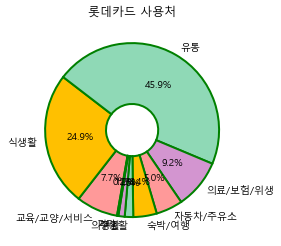

In [51]:
%matplotlib inline
ratio = [18141, 58319, 107409, 21434, 11605, 10211, 3682, 2750, 562]
labels = ['교육/교양/서비스', '식생활', '유통', '의료/보험/위생','자동차/주유소','숙박/여행','주생활','의생활','기타']
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
wedgeprops={'width': 0.7, 'edgecolor': 'g', 'linewidth': 2}

plt.title("롯데카드 사용처")
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops)
plt.show()

In [42]:
#df.sort_values(by="CTGR1", ascending=False).loc[['롯데카드']]
#df.sort_values(by="CTGR1", ascending=False).loc[['K7']]
#df.sort_values(by="CTGR1", ascending=False).loc[['마트']]
#df.sort_values(by="CTGR1", ascending=False).loc[['백화점']]
#df.sort_values(by="CTGR1", ascending=False).loc[['이커머스']]
#df.sort_values(by="CTGR1", ascending=False).loc[['슈퍼']]
#df.sort_values(by="CTGR1", ascending=False).loc[['홈쇼핑']] 마트 >>> 슈퍼의 영향력이  채소에 절대적 유통은 롯데카드가 절대적

CTGR1
CH_NM c                
롯데카드  유통         107409
      식생활         58319
      의료/보험/위생    21434
      교육/교양/서비스   18141
      자동차/주유소     11605
      숙박/여행       10211
      주생활          3682
      의생활          2750
      기타            562

In [52]:
data.groupby('GENDER').get_group('남')['CH_NM'].value_counts().to_frame()

,CH_NM
마트,180265
롯데카드,109537
슈퍼,52480
K7,30600
백화점,7560
이커머스,3853
홈쇼핑,690


<AxesSubplot:>

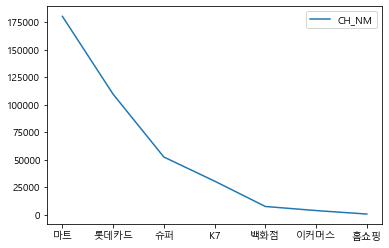

In [60]:
data.groupby('GENDER').get_group('남')['CH_NM'].value_counts().to_frame().plot()

In [59]:
import tqdm

<AxesSubplot:xlabel='GENDER,CH_NM'>

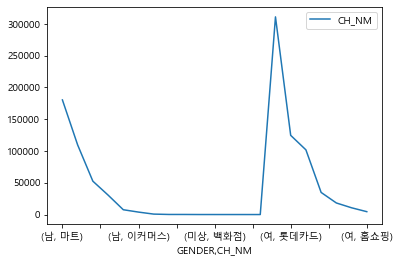

In [61]:
data.groupby('GENDER')['CH_NM'].value_counts().to_frame().plot()

In [93]:
pop = data.groupby('GENDER')['CH_NM'].value_counts().to_frame()
pop= pop.rename(columns={'CH_NM':'count'})
pop

count
GENDER CH_NM        
남      마트     180265
       롯데카드   109537
       슈퍼      52480
       K7      30600
       백화점      7560
       이커머스     3853
       홈쇼핑       690
미상     슈퍼        133
       마트        121
       K7         22
       백화점        18
       이커머스       13
       롯데카드        9
       홈쇼핑         3
여      마트     310904
       롯데카드   124567
       슈퍼     101751
       K7      34767
       백화점     18211
       이커머스    10632
       홈쇼핑      4520

In [ ]:
pop['Trial'] = pop.index.get_level_values(0)

In [91]:
pop.index.get_level_values(0)

Index(['남', '남', '남', '남', '남', '남', '남', '미상', '미상', '미상', '미상', '미상', '미상',
       '미상', '여', '여', '여', '여', '여', '여', '여'],
      dtype='object', name='GENDER')

In [88]:
pop = pop.reset_index(inplace=True)

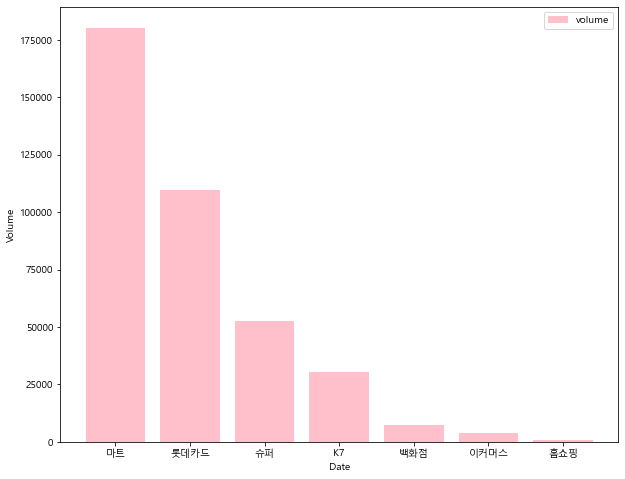

In [96]:
xs=data.groupby('GENDER').get_group('남')['CH_NM'].value_counts().to_frame().index.to_list() #플롯할 데이터 모두 list로 저장 
ys_volume=data.groupby('GENDER').get_group('남')['CH_NM'].value_counts().to_frame()['CH_NM'].to_list() 
plt.figure(figsize=(10, 8)) #전체 그래프 크기 설정 plt.subplot(2,1,1) 
#2행 1열에서 1번째 그래프 지정 

plt.bar(xs, ys_volume, color='pink', label='volume') #xy데이터 플롯-bar 
plt.xlabel('Date') #x축 이름 
plt.ylabel('Volume') #y축 이름 
plt.legend() #범례 표시
plt.show()

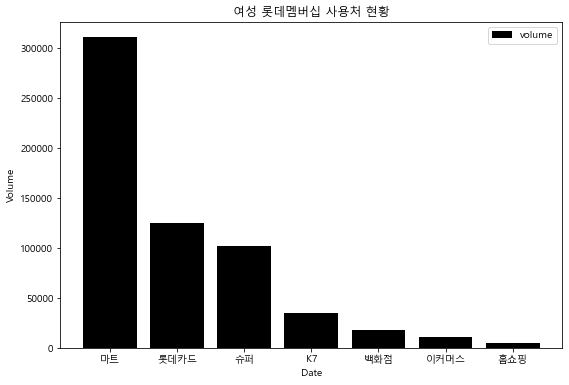

In [101]:
xs=data.groupby('GENDER').get_group('여')['CH_NM'].value_counts().to_frame().index.to_list() #플롯할 데이터 모두 list로 저장 
ys_volume=data.groupby('GENDER').get_group('여')['CH_NM'].value_counts().to_frame()['CH_NM'].to_list() 
plt.figure(figsize=(9, 6)) #전체 그래프 크기 설정 plt.subplot(2,1,1) 
#2행 1열에서 1번째 그래프 지정 

plt.title("여성 롯데멤버십 사용처 현황")
plt.bar(xs, ys_volume, color='black', label='volume') #xy데이터 플롯-bar 
plt.xlabel('Date') #x축 이름 
plt.ylabel('Volume') #y축 이름 
plt.legend() #범례 표시
plt.show()

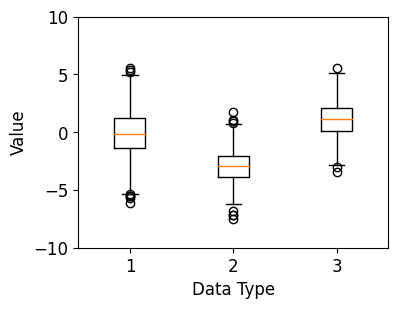

In [102]:
import matplotlib.pyplot as plt
import numpy as np

# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 12

# 2. 데이터 준비
np.random.seed(0)
data_a = np.random.normal(0, 2.0, 1000)
data_b = np.random.normal(-3.0, 1.5, 500)
data_c = np.random.normal(1.2, 1.5, 1500)

# 3. 그래프 그리기
fig, ax = plt.subplots()

ax.boxplot([data_a, data_b, data_c])
ax.set_ylim(-10.0, 10.0)
ax.set_xlabel('Data Type')
ax.set_ylabel('Value')

plt.show()

In [164]:
data.groupby('CH_NM')['AM'].sum().to_frame()
data.groupby('CH_NM')['CT'].sum().to_frame()
am = pd.merge(data.groupby('CH_NM')['AM'].sum().to_frame(), data.groupby('CH_NM')['CT'].sum().to_frame(), on ='CH_NM')
am

,AM,CT
CH_NM,,
K7,247425100,104651
롯데카드,9290793049,234113
마트,3559274606,1076548
백화점,3132605073,39622
슈퍼,685381874,207099
이커머스,801817174,21116
홈쇼핑,3732070000,59648


In [ ]:
am.columns=['amount','count']
am['averge'] = am['amount']/am['count']
am.columns=['amount','count','average_mn']
am

In [195]:
km = data.groupby('CH_NM')['CT'].count().to_frame()
km.columns = ['ct']
ko= pd.merge(am,km,on='CH_NM')
ko['averge_ct'] = ko['count']/ko['ct']

In [198]:
ko.columns = ['총구매액','구매개수','개별평균구매액','구매회수','1회당평균구매개수']
ko

,총구매액,구매개수,개별평균구매액,구매회수,1회당평균구매개수
CH_NM,,,,,
K7,247425100,104651,2364.287967,65389,1.600437
롯데카드,9290793049,234113,39685.079637,234113,1.000000
마트,3559274606,1076548,3306.192205,491290,2.191268
백화점,3132605073,39622,79062.265231,25789,1.536391
슈퍼,685381874,207099,3309.440770,154364,1.341628
이커머스,801817174,21116,37972.019985,14498,1.456477
홈쇼핑,3732070000,59648,62568.233637,5213,11.442164


In [166]:
data.iloc[data[data['AM']==data['AM'].max()].index]
data.iloc[data[data['CT']==data['CT'].max()].index]

,ID,CAR_YEAR,ENGINE,DETAIL,GENDER,AGE,SIDO,GUNGU,Unnamed: 8,CH_NM,...,STORE_SIDO,STORE_GUNGU,DATE,CTGR1,CTGR2,CTGR3,BRAND,PRD_NM,CT,AM
470299,RSM_18859,20MY,1.6 GTe,LE Plus,여,4549,경기,경기 파주시,NaN,홈쇼핑,...,-,-,20210622,스포츠패션,여성스포츠화,여성스포츠샌들/슬리퍼,스위스런,[공식]스위스런 아쿠아슈즈 성인/아동/키즈/커플/가족신발 20종 택1,1900,18430000


In [184]:
data.groupby([data['ENGINE'],data['DETAIL'],data['CH_NM']])['GENDER'].value_counts(normalize=True).unstack(level=2).T.to_excel("tby.xlsx", header=True)
data.groupby([data['ENGINE'],data['DETAIL'],data['CH_NM']])['AGE'].value_counts(normalize=True).unstack(level=2).T.to_excel("tby.xlsx", header=True)
data.groupby([data['ENGINE'],data['DETAIL'],data['CH_NM']])['SIDO'].value_counts(normalize=True).unstack(level=2).T.to_excel("tby.xlsx", header=True)
data.groupby([data['ENGINE'],data['DETAIL'],data['CH_NM']])['GUNGU'].value_counts(normalize=True).unstack(level=2).T.to_excel("tby.xlsx", header=True)
data.groupby([data['ENGINE'],data['DETAIL'],data['CH_NM']])['CH_NM'].value_counts(normalize=True).unstack(level=2).T.to_excel("tby.xlsx", header=True)
data.groupby([data['ENGINE'],data['DETAIL'],data['CH_NM']])['CTGR1'].value_counts(normalize=True).unstack(level=2).T.to_excel("tby.xlsx", header=True)
data.groupby([data['ENGINE'],data['DETAIL'],data['CH_NM']])['CTGR2'].value_counts(normalize=True).unstack(level=2).T.to_excel("tby.xlsx", header=True)
data.groupby([data['ENGINE'],data['DETAIL'],data['CH_NM']])['CTGR3'].value_counts(normalize=True).unstack(level=2).T.to_excel("tby.xlsx", header=True)

In [185]:
data.groupby([data['ENGINE'],data['DETAIL'],data['CH_NM']])['CTGR3'].value_counts(normalize=True).unstack(level=2).T

ENGINE 1.6 GTe                                                                 \
DETAIL      LE                                                                  
CTGR3     2단우산      3단우산 BB/파운데이션/컴팩트류  CA/TV홈쇼핑     DIY가구     DIY완구    DUMMY   
CH_NM                                                                           
K7      0.0004  0.000400           NaN       NaN       NaN       NaN      NaN   
롯데카드       NaN       NaN           NaN  0.000124       NaN       NaN  0.00112   
마트         NaN  0.000027      0.000351       NaN  0.000027  0.000135      NaN   
백화점        NaN       NaN      0.000489       NaN       NaN       NaN      NaN   
슈퍼         NaN       NaN           NaN       NaN       NaN       NaN      NaN   
이커머스       NaN       NaN      0.009240       NaN       NaN       NaN      NaN   
홈쇼핑        NaN       NaN      0.009434       NaN       NaN       NaN      NaN   

ENGINE                                 ...       TCe 260                      \
DETAIL                                 ... RE Signature+                       
CTGR3  EC(식기/홈데코)  EC(장신잡화) L/B (홈패션)  ...            어묵     옥수수스낵        유부   
CH_NM                                  ...                                     
K7            NaN       NaN       NaN  ...           NaN       NaN       NaN   
롯데카드          NaN       NaN       NaN  ...           NaN       NaN       NaN   
마트            NaN       NaN       NaN  ...      0.016393  0.065574  0.016393   
백화점      0.000978  0.001467  0.002934  ...           NaN       NaN       NaN   
슈퍼            NaN       NaN       NaN  ...           NaN  0.058824       NaN   
이커머스          NaN       NaN       NaN  ...           NaN       NaN       NaN   
홈쇼핑           NaN       NaN       NaN  ...           NaN       NaN       NaN   

ENGINE                                                                      
DETAIL                                                                      
CTGR3        일반빵      일반스낵      일반우유   전자담배용리필      크래커      파스타류       팝콘  
CH_NM                                                                       
K7           NaN       NaN       NaN  0.333333      NaN       NaN      NaN  
롯데카드         NaN       NaN       NaN       NaN      NaN       NaN      NaN  
마트      0.016393  0.081967  0.081967       NaN  0.04918  0.032787  0.04918  
백화점          NaN       NaN       NaN       NaN      NaN       NaN      NaN  
슈퍼           NaN  0.352941       NaN       NaN      NaN       NaN      NaN  
이커머스         NaN       NaN       NaN       NaN      NaN       NaN      NaN  
홈쇼핑          NaN       NaN       NaN       NaN      NaN       NaN      NaN  

[7 rows x 10913 columns]

In [207]:
home= data.groupby('CH_NM').get_group('홈쇼핑')
home

,ID,CAR_YEAR,ENGINE,DETAIL,GENDER,AGE,SIDO,GUNGU,Unnamed: 8,CH_NM,...,STORE_SIDO,STORE_GUNGU,DATE,CTGR1,CTGR2,CTGR3,BRAND,PRD_NM,CT,AM
28,RSM_00004,20MY,TCe 260,RE Signature,여,2529,인천,인천 미추홀구,NaN,홈쇼핑,...,-,-,20201121,스포츠패션,여성일반스포츠의류,여성트레이닝복,안다르,코듀라 NZ 집업 블랙 (AANZ-00206),3,87780
538,RSM_00032,21MY,1.6 GTe,LE Plus,여,5559,경기,경기 시흥시,NaN,홈쇼핑,...,-,-,20211009,속옷/양말/홈웨어,여성속옷,여성속옷세트,왁스,&WOX 왁스 레이스 보타닉 아이픽스 브라 패키지,10,915750
539,RSM_00032,21MY,1.6 GTe,LE Plus,여,5559,경기,경기 시흥시,NaN,홈쇼핑,...,-,-,20210624,패션잡화,여성화,여성샌들,아보크,[아보크] 여성쥬얼샌들 + 웻지슈즈 (2종SET),28,1117200
540,RSM_00032,21MY,1.6 GTe,LE Plus,여,5559,경기,경기 시흥시,NaN,홈쇼핑,...,-,-,20211008,패션잡화,여성화,기타여성화,나무하나,나무하나 웨이크스니커즈 (wake sneakers),84,12780600
1448,RSM_00043,20MY,TCe 260,RE Signature,여,4044,서울,서울 양천구,NaN,홈쇼핑,...,-,-,20210313,세제/위생,주방세제,일반주방세제,실리만세라,실리콘 어린이 식탁매트 WSB264 사자,1,13040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990000,RSM_38808,20MY,TCe 260,RE,여,4549,경기,경기 수원시 팔달구,NaN,홈쇼핑,...,-,-,20201224,화장품/뷰티케어,스킨케어,스킨/토너,뷰디아니,[유통기한 21.08.27까지] 더 리프레싱 바디 로션 (라벤더),1,3000
990001,RSM_38808,20MY,TCe 260,RE,여,4549,경기,경기 수원시 팔달구,NaN,홈쇼핑,...,-,-,20210927,세제/위생,주방세제,일반주방세제,기본에,기본에 주방용품 균일가전 16종 택1 (행주티슈/지퍼백/크린백/고무장갑 外),109,1079100
990653,RSM_38837,21MY,1.6 GTe,LE Plus,여,4044,경남,경남 진주시,NaN,홈쇼핑,...,-,-,20210910,여성의류,여성의류상의,여성스웨터/풀오버,NaN,브루스필드 캐시미어 블랜디드 카라 니트 3종,15,1005000
990654,RSM_38837,21MY,1.6 GTe,LE Plus,여,4044,경남,경남 진주시,NaN,홈쇼핑,...,-,-,20210613,속옷/양말/홈웨어,여성속옷,여성속옷세트,저스트마이사이즈,JUST MY SIZE 저스트마이사이즈 핫썸머 매직핏 슬리머 패키지 (추가구성: 랜...,12,1430400
